1. Top 5 Factors
2. Hypothesis a) Job satisfaction b) Work Life Balance c) Over Time d)Age e)Department: 

Actual Affecting: ) Job satisfaction b) Work Life Balance c) Over Time d)Age 

### Importing Libraries

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline

#Setting the palette
sns.set_style('darkgrid')
sns.set_palette("Set3", 9)

### Importing Attrition DataSet

In [3]:
att = pd.read_csv(r'C:\Users\Chief\Documents\Praxis\Term 1\IML\Attrition\attrition.csv')

In [4]:
att.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [5]:
att.tail()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2
1469,34,0,Travel_Rarely,Research & Development,Medical,2,Male,4,2,3,Married,4404,No,6,4,4,3,1,2,8


In [6]:
att.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [7]:
att.shape

(1470, 20)

<br> We have data of 1470 employees and 19 features 

### Checking unique values in The DataSet

<br> Printing the unique values if it is less than 10 otherwise just the count of unique Values

In [8]:
for column in att:
    unique_values = np.unique(att[column])
    unique_no = len(unique_values)
    if unique_no < 10:
        print("The number of unique values for feature {} is {} -- {}".format(column,unique_no, unique_values ))
    else:
        print("The number of unique values for feature {} is {} ".format(column,unique_no ))

The number of unique values for feature Age is 43 
The number of unique values for feature Attrition is 2 -- [0 1]
The number of unique values for feature BusinessTravel is 3 -- ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
The number of unique values for feature Department is 3 -- ['Human Resources' 'Research & Development' 'Sales']
The number of unique values for feature EducationField is 6 -- ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
The number of unique values for feature EnvironmentSatisfaction is 4 -- [1 2 3 4]
The number of unique values for feature Gender is 2 -- ['Female' 'Male']
The number of unique values for feature JobInvolvement is 4 -- [1 2 3 4]
The number of unique values for feature JobLevel is 5 -- [1 2 3 4 5]
The number of unique values for feature JobSatisfaction is 4 -- [1 2 3 4]
The number of unique values for feature MaritalStatus is 3 -- ['Divorced' 'Married' 'Single']
The number of unique values for feature Month

### Checking Missing Values

In [9]:
att.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

<br> We have no Missing values

### Target Variable (Attrition)
#### {1 : Left the Company, 0: Still in the Company}

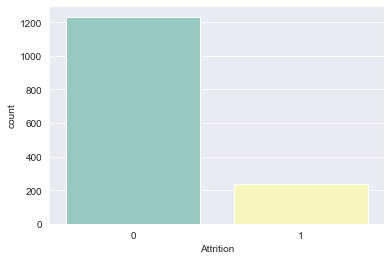

Percent of people who have left the company:  16.12 %


In [28]:
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition', data = att, palette = 'Set3')
plt.show()
print('Percent of people who have left the company: ', round(len(att[att['Attrition'] == 1]) * 100/ len(att["Attrition"]), 2),'%')

## Count of Categorical Variable 

C:\Users\Chief\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chief\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chief\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Chief\Anaconda3\lib\site-

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

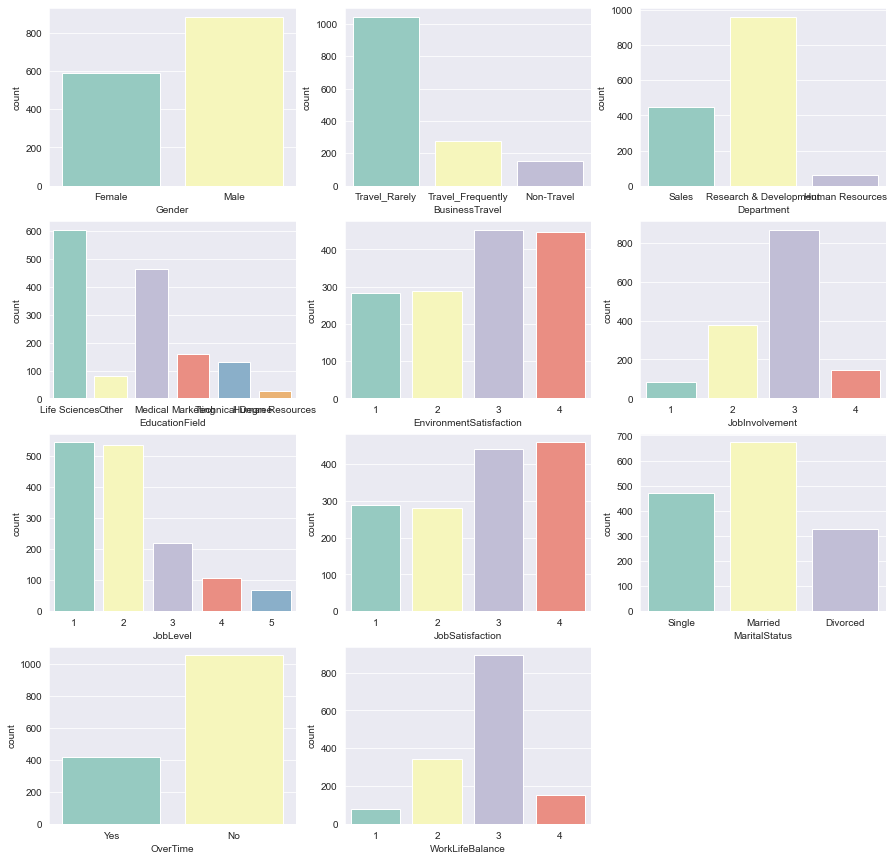

In [18]:
plt.figure(figsize = (15,15))
sns.set_palette("Set3")
plt.subplot(4,3,1)
sns.countplot(att.Gender)


plt.subplot(4,3,2)
sns.countplot(att.BusinessTravel)

plt.subplot(4,3,3)
sns.countplot(att.Department)

plt.subplot(4,3,4)
sns.countplot(att.EducationField)

plt.subplot(4,3,5)
sns.countplot(att.EnvironmentSatisfaction)

plt.subplot(4,3,6)
sns.countplot(att.JobInvolvement)

plt.subplot(4,3,7)
sns.countplot(att.JobLevel)

plt.subplot(4,3,8)
sns.countplot(att.JobSatisfaction)

plt.subplot(4,3,9)
sns.countplot(att.MaritalStatus)

plt.subplot(4,3,10)
sns.countplot(att.OverTime)

plt.subplot(4,3,11)
sns.countplot(att.WorkLifeBalance)

In [10]:
## dtype != object (int)

num = []
for column in att.columns:
    if att[column].dtype != object:
        
        #print(column)
        print(f"{column} : {att[column].unique()}")# gives unique values in each column
        print("\n")
        num.append(column)

#remove attrition from this list:
num.remove("Attrition")
num

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition : [1 0]


EnvironmentSatisfaction : [2 3 4 1]


JobInvolvement : [3 2 4 1]


JobLevel : [2 1 3 4 5]


JobSatisfaction : [4 2 3 1]


MonthlyIncome : [5993 5130 2090 ... 9991 5390 4404]


TotalWorkingYears : [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]


WorkLifeBalance : [1 3 2 4]


YearsAtCompany : [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]


YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]


YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]


YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]




['Age',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

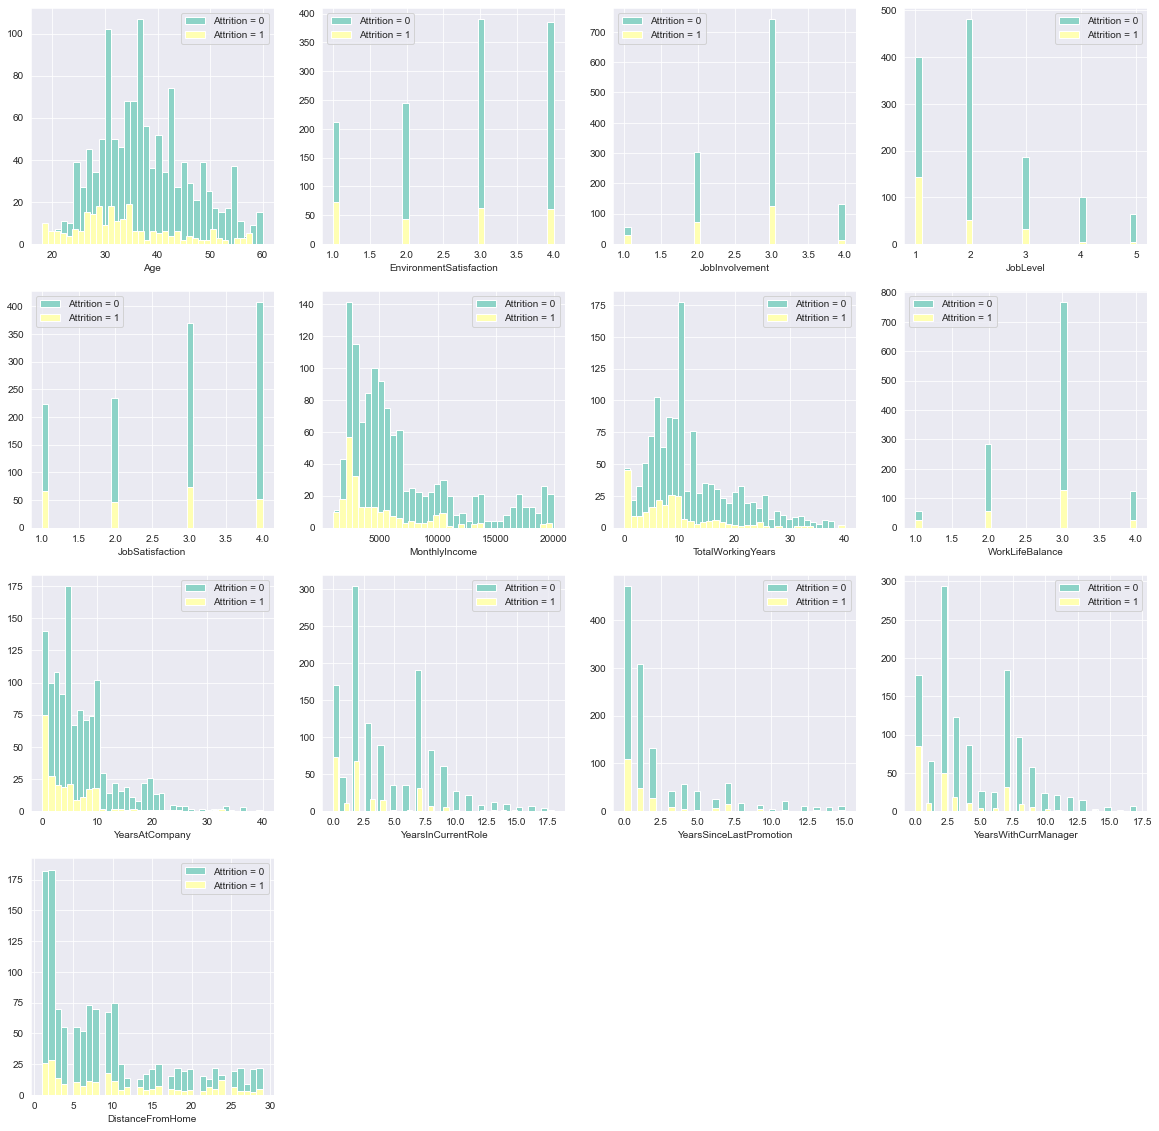

In [17]:
# Numerical: 

plt.figure(figsize = (20,20))
for i, column in enumerate(num, 1):
    plt.subplot(4, 4, i) # rows, cols, index
    att[att["Attrition"] == 0][column].hist(bins = 35 , label = "Attrition = 0")
    att[att["Attrition"] == 1][column].hist(bins = 35 , label = "Attrition = 1")
    plt.legend()
    plt.xlabel(column)
    
plt.savefig("NumericalVar.png", bbox_inches = "tight", dpi= 300)


In [21]:
## data type = object
obj = []
for column in att.columns:
    if att[column].dtype == object:
        obj.append(column)
        print(att[column].value_counts())
        print("\n")

# 06 variables -> dtype = object
## BusinessTravel, Department,EducationField, 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


No     1054
Yes     416
Name: OverTime, dtype: int64




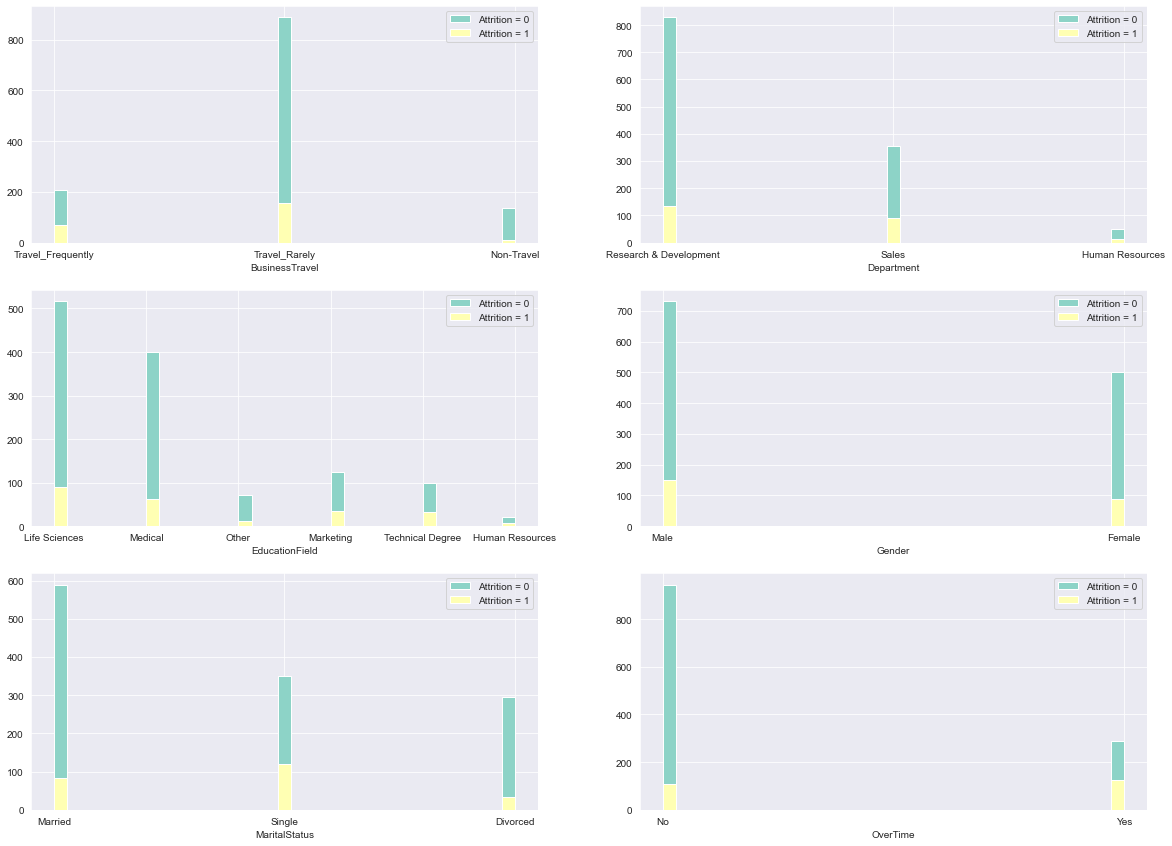

In [22]:
#Categorical:

plt.figure(figsize = (20,20))
for i, column in enumerate(obj, 1):
    plt.subplot(4, 2, i) # rows, cols, index
    att[att["Attrition"] == 0][column].hist(bins = 35, label = "Attrition = 0")
    att[att["Attrition"] == 1][column].hist(bins = 35, label = "Attrition = 1")
    plt.legend()
    plt.xlabel(column)
    
plt.savefig("CategoricalVar.png", bbox_inches = "tight", dpi= 300)

### Distribution of Age

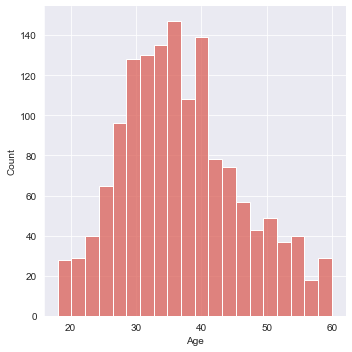

In [16]:
sns.displot(att, x= att.Age, bins=20)

<br> Most of the employees are between the age of 30 to 40

Does Age play an important part in Attrition? Do freshers leave the job or mid level people leave the job

### Distribution of Monthly Salary

<AxesSubplot:xlabel='MonthlyIncome'>

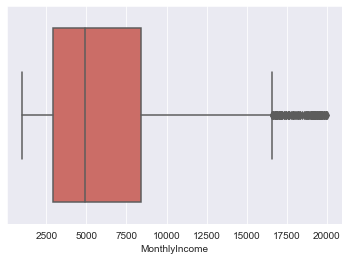

In [17]:
sns.boxplot(x = 'MonthlyIncome',data = att)

C:\Users\Chief\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome'>

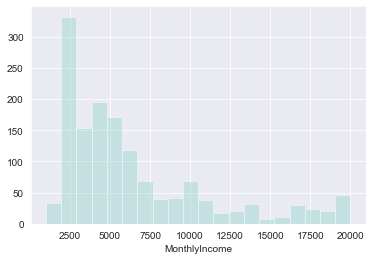

In [19]:
sns.distplot(att.MonthlyIncome, kde = False)

<br> How many people are earning more than the extreme values?

## Gender Analysis

What is the age distribution by Gender? Are there any discrepancies?
Is there any gender more disatisfied than the other?
Is there a difference in Monthly Salaries between Gender?

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

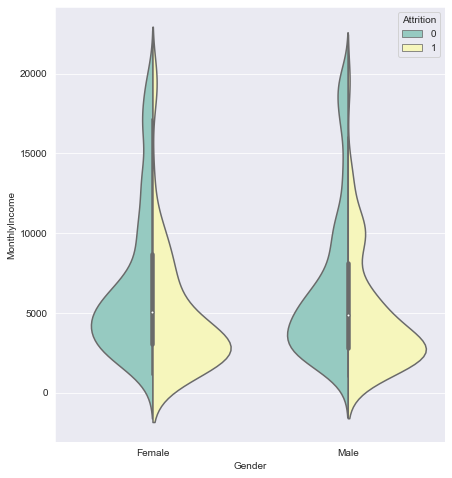

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,8))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split= True,data=att)

##### Inference:

The genders weren't discriminated in income. The attrition is at the same rate in both the cases and the majority is at lower Monthly Income. 

<br> As the data is imbalanced how do we need to take this into consideration for our analysis?

### Attrition Based on Gender

<AxesSubplot:xlabel='Attrition', ylabel='count'>

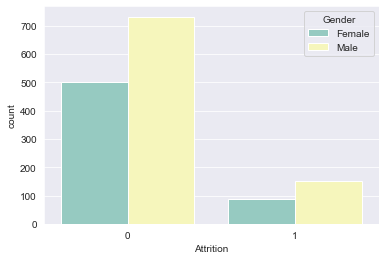

In [29]:
sns.countplot(x = 'Attrition', hue= 'Gender', data = att, palette = 'Set3')

### Attrition Based on Department

<AxesSubplot:xlabel='Attrition', ylabel='count'>

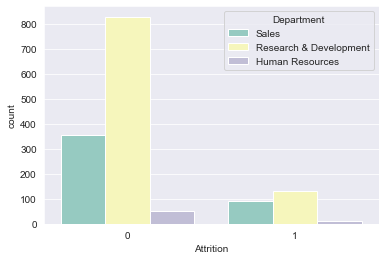

In [30]:
sns.countplot(x = 'Attrition', hue = 'Department', data = att, palette = 'Set3')

<AxesSubplot:xlabel='Department', ylabel='count'>

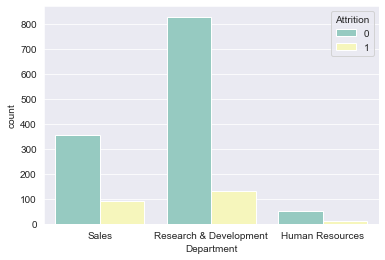

In [31]:
sns.countplot(x = 'Department', hue = 'Attrition', data = att, palette = 'Set3')

<br> A majority of people who have left the company are from Research and Development Department, followed by sales department. Is the manager or the functioning of the R&D Department is bad?? More analysis has to be done for the R&D Department

<br> Maybe the countplot is giving a wrong interpretation as the data set is imbalanced, let's try stacked bar chart and see in attrition what percentage of it is affected by other features

## Insights on the Attrition Rate
This section deals with exploring various factors which might lead to Attrition in the company, and also try to understand what might be potential causes for it. 

Top 5 factors which we thought would affect the Attrition (Hypothesis)
- Job satisfaction
- Work Life Balance
- Over Time
- Age
- Department

### Low Job Satisfaction:
Let's see if low job satisfaction is one of the key reasons of attrition

In [23]:
myData = att.copy()

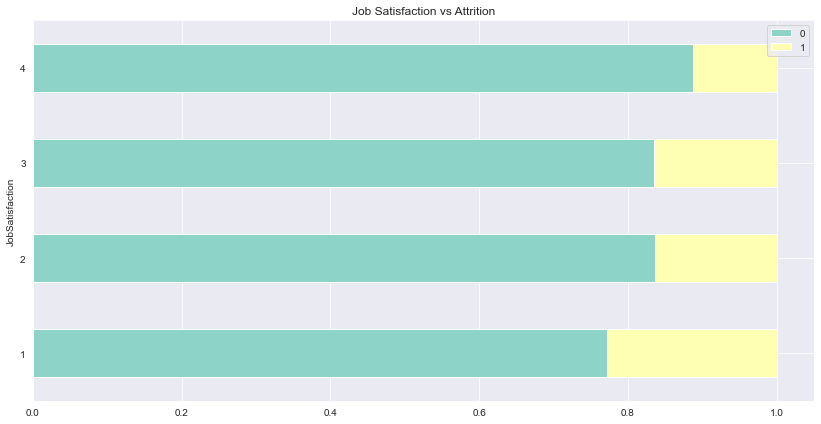

In [24]:
myDatavsAttrition = pd.crosstab(index = myData['JobSatisfaction'] , columns  = myData['Attrition'], normalize = 'index')
myDatavsAttrition.plot(kind = 'barh', stacked = True, figsize = (14,7), title = 'Job Satisfaction vs Attrition', ylabel = 'Percentage of Attrition' )
plt.legend(loc = 'upper right')
plt.xticks(rotation= 0)
plt.savefig("Job SatisfactionVSAttrition.png",dpi=300)

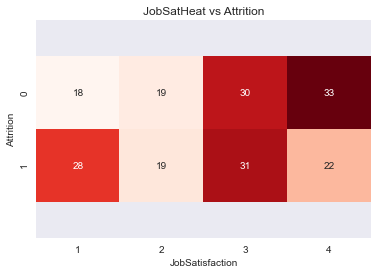

In [25]:
# Normalized on the basis of Attrition

JobSatHeat = pd.crosstab(index=myData["Attrition"],columns = myData["JobSatisfaction"],normalize='index')

ax = sns.heatmap(JobSatHeat*100, cmap="Reds",annot= True, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("JobSatHeat vs Attrition")
plt.savefig("OvertimeVSAttrition.png",dpi=300)

Text(0.5, 1.0, 'JobSatHeat vs Attrition')

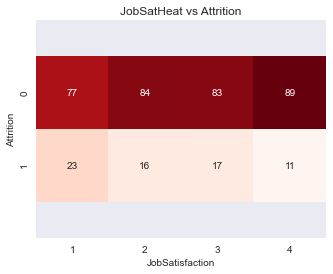

In [26]:
# Normalized on the basis of Job Satisfaction

JobSatHeat = pd.crosstab(index=myData["Attrition"],columns = myData["JobSatisfaction"],normalize='columns')

ax = sns.heatmap(JobSatHeat*100, cmap="Reds",annot= True, cbar = False, square = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("JobSatHeat vs Attrition")
#plt.savefig("OvertimeVSAttrition.png",bbox_inches='tight',dpi=300)

#### Inferences:

- Employees who have low JS tends to leave more as compared to higher ratings.
- But employee who leave the job are not necessarily disastisfied with the  job.

### WorkLife Balance

Attrition               0         1
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471


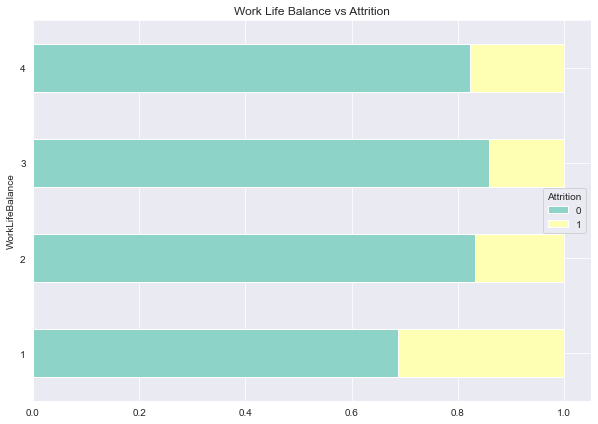

In [27]:
WorkLifeBalancevsAttrition = pd.crosstab(index = myData['WorkLifeBalance'], columns  = myData['Attrition'] , normalize = 'index')
print(WorkLifeBalancevsAttrition)
WorkLifeBalancevsAttrition.plot(kind = 'barh', stacked = True, figsize = (10,7), title = 'Work Life Balance vs Attrition', ylabel = 'Percentage of Attrition' )
plt.savefig("Work Life Balance vs Attrition.png",dpi=300)

(2.5, -0.5)

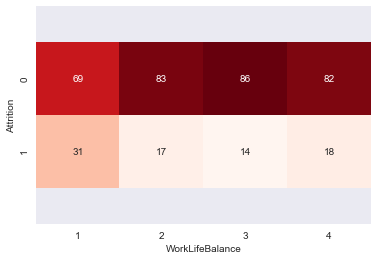

In [30]:
# Normalized on the Work Life Balance
JobSatHeat = pd.crosstab(index=myData["Attrition"],columns = myData["WorkLifeBalance"],normalize='columns')

ax = sns.heatmap(JobSatHeat*100, cmap="Reds",annot= True, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.title("WorkLifeBalance vs Attrition")

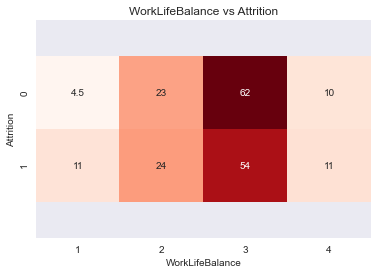

In [31]:
# Normalized on the basis of Attrition

JobSatHeat = pd.crosstab(index=myData["Attrition"],columns = myData["WorkLifeBalance"],normalize='index')

ax = sns.heatmap(JobSatHeat*100, cmap="Reds",annot= True, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("WorkLifeBalance vs Attrition")
plt.savefig("Work Life Balance vs Attrition heat.png",dpi=300)

#### Inferences:

- Employees who have poor worklife Balance have left the company

### Over Time

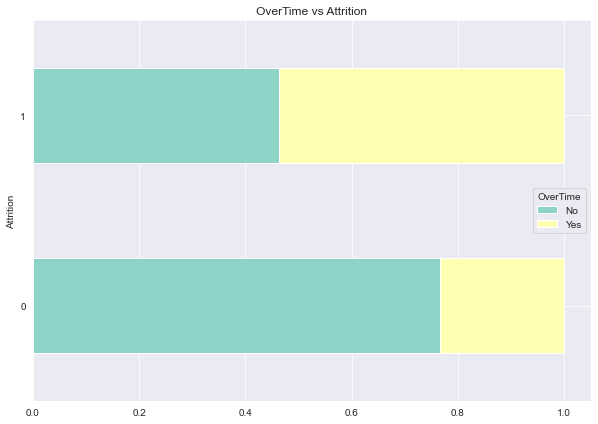

In [33]:
# Normalized on the basis of Attrition

OverTimevsAttrition = pd.crosstab(index = myData['Attrition'] , columns  = myData['OverTime'], normalize = 'index')

OverTimevsAttrition.plot(kind = 'barh', stacked = True, figsize = (10,7), title = 'OverTime vs Attrition', ylabel = 'Percentage of Attrition')
plt.savefig("Over Time vs Attrition.png",dpi=300)

Text(0.5, 1.0, 'Overtime vs Attrition')

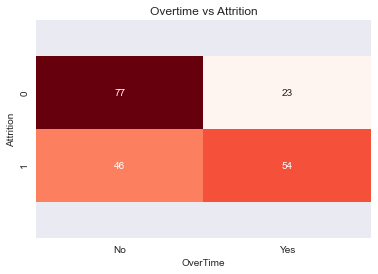

In [36]:
# Normalized on the basis of Attrition

OvertimeVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["OverTime"],normalize='index')

ax = sns.heatmap(OvertimeVSattrition*100, cmap="Reds",annot= True, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Overtime vs Attrition")
#plt.savefig("OvertimeVSAttrition.png",bbox_inches='tight',dpi=300)

Text(0.5, 1.0, 'Overtime vs Attrition')

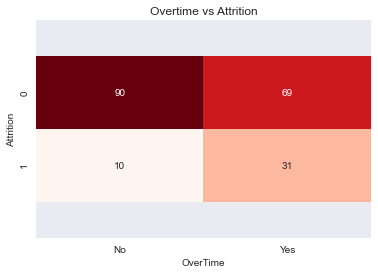

In [35]:
# Normalized on the basis of Over Time

OvertimeVSattrition = pd.crosstab(index=myData["Attrition"],columns = myData["OverTime"],normalize='columns')

ax = sns.heatmap(OvertimeVSattrition*100, cmap = 'Reds',annot= True, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Overtime vs Attrition")
#plt.savefig("OvertimeVSAttrition.png",bbox_inches='tight',dpi=300)

#### Inferences

- Employee who have left the company have worked more overtime as compared to people who haven't

### Age Vs Attrition

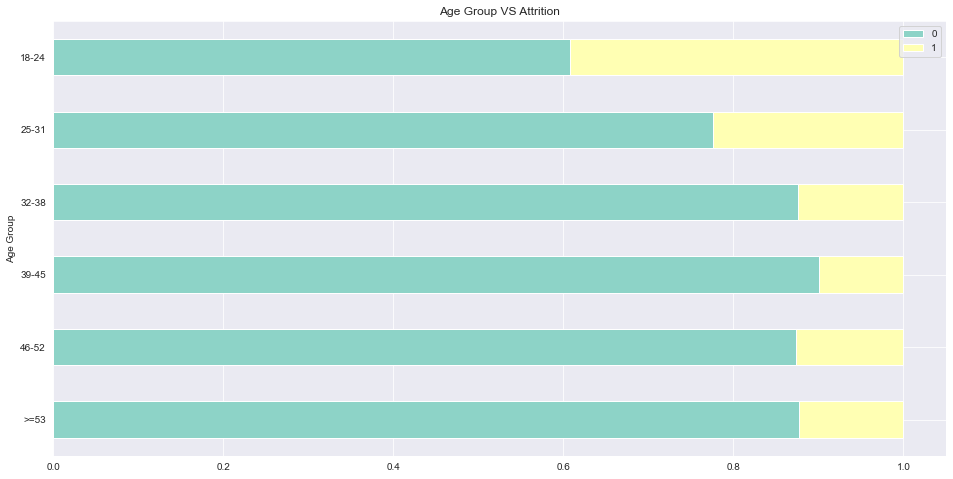

In [40]:
myData["Age_Group"] = ""
myData.loc[myData["Age"].between(18,24),"Age_Group"] = "18-24"
myData.loc[myData["Age"].between(25,31),"Age_Group"] = "25-31"
myData.loc[myData["Age"].between(32,38),"Age_Group"] = "32-38"
myData.loc[myData["Age"].between(39,45),"Age_Group"] = "39-45"
myData.loc[myData["Age"].between(46,52),"Age_Group"] = "46-52"
myData.loc[myData["Age"] >= 53,"Age_Group"] = ">=53"


ageGroupsVSattrition = pd.crosstab(index=myData["Age_Group"],
                                   columns=myData["Attrition"],
                                   normalize= "index"
                                  )

ageGroupsVSattrition.sort_values('Age_Group',inplace=True, ascending = False)
ageGroupsVSattrition.plot(kind="barh",stacked=True,figsize = (16,8), legend = False, xlabel = 'Age Group', ylabel = '% Attrition')
plt.legend(loc = 'upper right')
plt.title('Age Group VS Attrition')
plt.xticks(rotation= 0)
plt.savefig("AgeGroupVSAttritionH.png",dpi=300)

#### Inferences

- The Age does play a major impact on the attrition, the highest among any other factor
- Though this is quite normal as for higher packages employee do switch jobs in the beginning of their career.

### Attrition VS Department

- This is to check,if employees who were trained for a required field, by education, do indeed pursue a work in that field or not ? And if not does it lead to eventually quitting the job for a different job ?

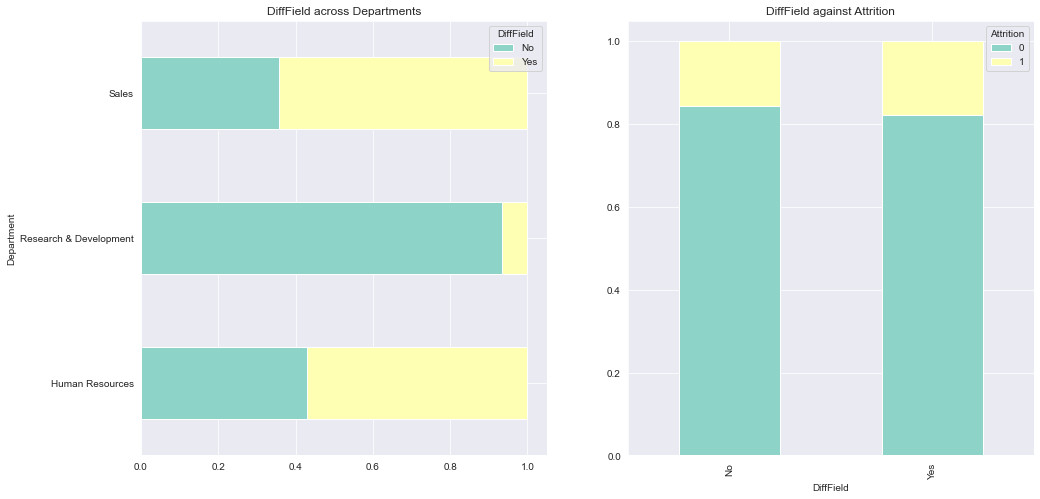

In [41]:
myData["DiffField"] = 'Yes' # Creating and Initializing Different Fields as YES

# If Education Field and the Department is same then changing the value of the Different Field Column to No
myData.loc[(myData["EducationField"].isin(['Life Sciences','Medical','Technical Degree']) &
           (myData["Department"] == 'Research & Development')), "DiffField"] = 'No'
myData.loc[(myData["EducationField"].isin(["Marketing"]) & 
           (myData["Department"] == 'Sales')),"DiffField"] = 'No'
myData.loc[(myData["EducationField"].isin(["Human Resources"]) &
           (myData["Department"] == 'Human Resources')),"DiffField"] = 'No'
myDataVSattrition = pd.crosstab(index=myData["DiffField"],columns = myData["Attrition"],normalize="index")
myDataVSdept = pd.crosstab(index=myData["Department"],columns = myData["DiffField"],normalize="index")

fig,ax = plt.subplots(1,2,figsize=(16,8))
myDataVSdept.plot(kind='barh',stacked=True,ax=ax[0])
ax[0].set_title("DiffField across Departments")
myDataVSattrition.plot(kind='bar',stacked=True,ax=ax[1])
ax[1].set_title("DiffField against Attrition")

plt.savefig("DiffEduFieldVSAttrition.png",bbox_inches = "tight",dpi=300)

#### Inferences

- For R&D department, Only 6% of employees claim to be from different educational background than required by the job.
- 57% of employees in HR and 64% of employees in Sales, were trained in a different educational stream than what is required by the Job.
- Off all the employees who belonged to this category only 18% of them left the job, this means that its not an important predictor for Attrition.

### Correlation Analysis

In [24]:
# Transform categorical data into dummies
dummy_col = ['BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
#type(dummy_col)

att_dummy = pd.get_dummies(att, columns = dummy_col,dtype = "uint8") #uint8 => dtype for categorical variables

att_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 99 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   MonthlyIncome                      1470 non-null   int64
 3   TotalWorkingYears                  1470 non-null   int64
 4   YearsAtCompany                     1470 non-null   int64
 5   DistanceFromHome                   1470 non-null   int64
 6   BusinessTravel_Non-Travel          1470 non-null   uint8
 7   BusinessTravel_Travel_Frequently   1470 non-null   uint8
 8   BusinessTravel_Travel_Rarely       1470 non-null   uint8
 9   Department_Human Resources         1470 non-null   uint8
 10  Department_Research & Development  1470 non-null   uint8
 11  Department_Sales                   1470 non-null   uint8
 12  EducationField_Human

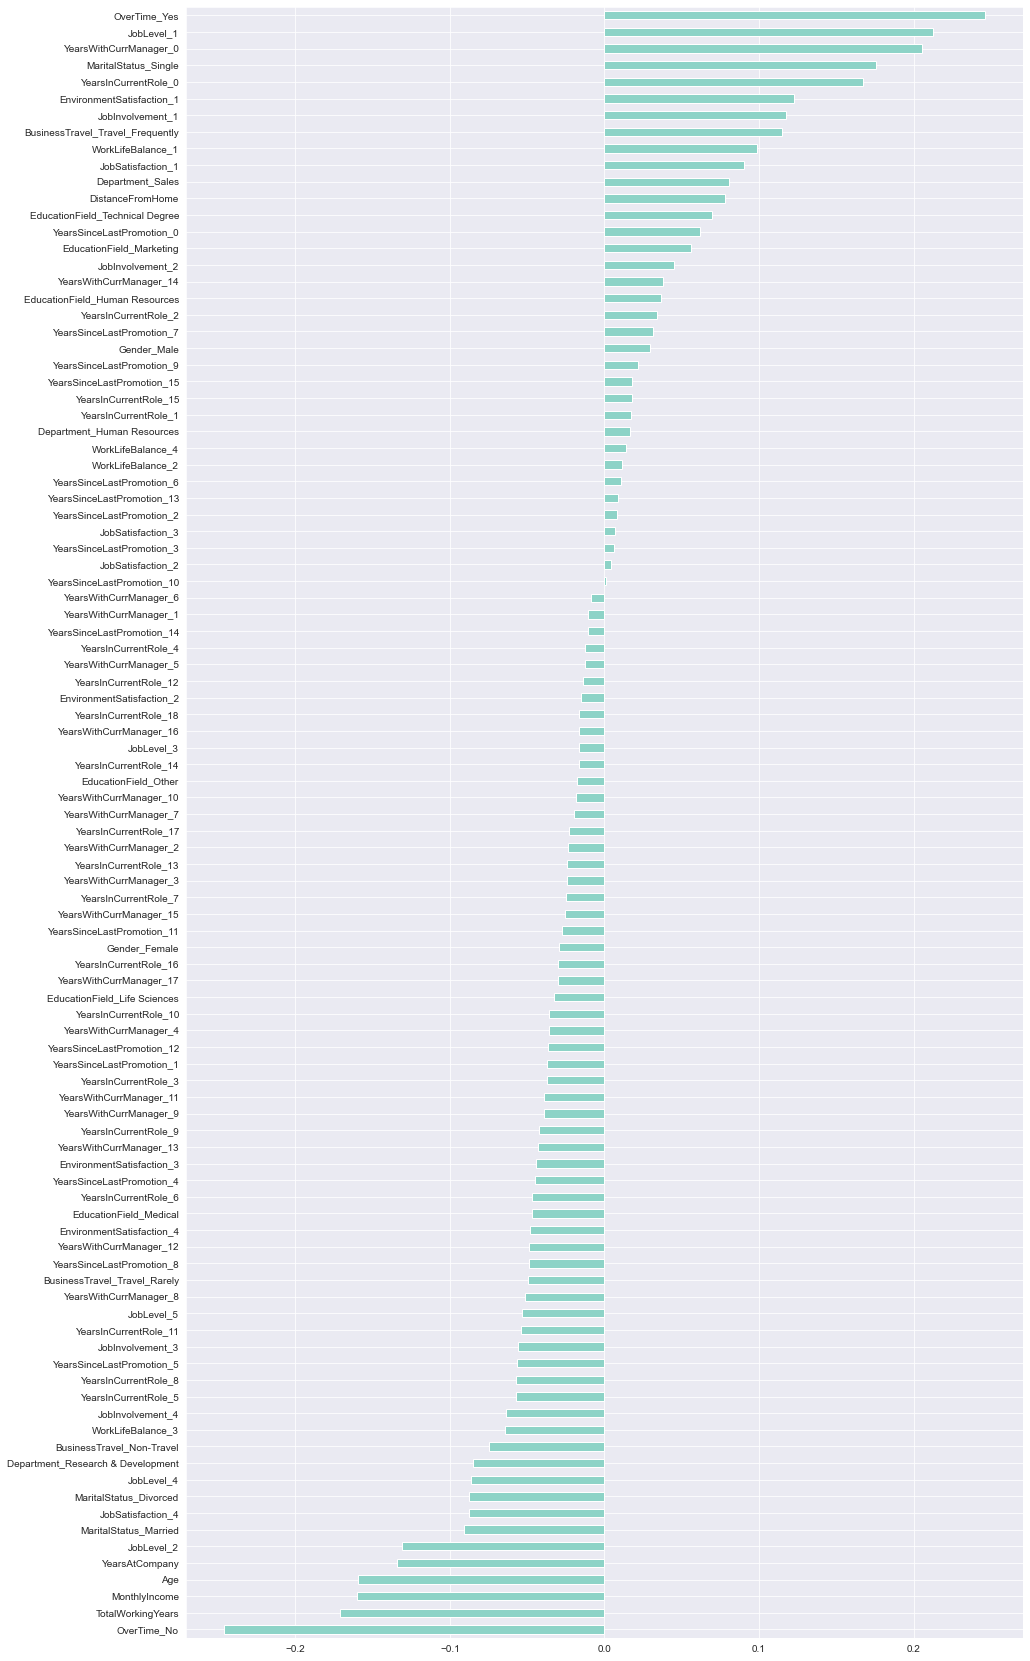

In [26]:
att_dummy.drop("Attrition", axis =1).corrwith(att.Attrition).sort_values().plot(kind = "barh", figsize= (15,30))

## overtime_yes, job level_1, yearswithcurrmanager_0, maritalstatus_Single, yearsInCurrentRole_0 : add independent var
## bottom 5 : Overtime_No, TotalWorkingYears, MonthlyIncome, Age, YearsAtCompany

plt.savefig("Correlation_allvar.png", bbox_inches = "tight", dpi= 300)

#### Correlation Inferences :
- Individually none of the variables show a significant Correlation with Attrition as all the values of Correlation is between -0.2 to 0.2 ( Uncorrelated )
- When ordered based on Correlation Values, the top features which have the highest correlation are :
a) Overtime ( Yes ) : People who work OverTime
b) JobLevel ( 1 ) : People who are junior-most (younger section) in the company
c) YearsWithCurrManager : People who are junior and includes those whose manager chan